In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [3]:
nba_data = pd.read_csv('all_seasons.csv',index_col='player_name')
nba_data.drop(columns=['Unnamed: 0'],inplace=True)
nba_data['player_height'] = nba_data['player_height'].apply(lambda x: round((x/2.54)/12,2))
nba_data['player_weight'] = nba_data['player_weight'].apply(lambda x: round((x * 2.2046),0))
nba_data.head()

,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
player_name,,,,,,,,,,,,,,,,,,,,
Travis Knight,LAL,22.0,7.00,235.0,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
Matt Fish,MIA,27.0,6.92,235.0,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
Matt Bullard,HOU,30.0,6.83,235.0,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
Marty Conlon,BOS,29.0,6.92,245.0,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
Martin Muursepp,DAL,22.0,6.75,235.0,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


<AxesSubplot:xlabel='player_weight', ylabel='player_height'>

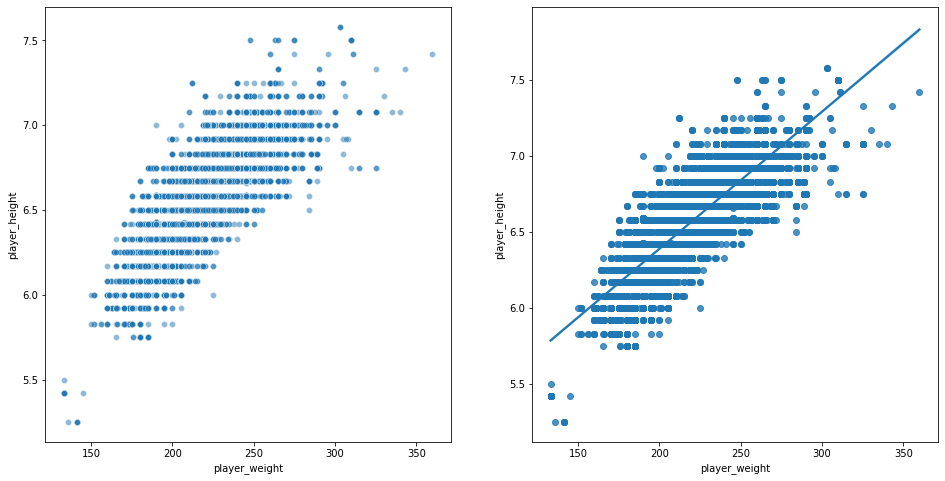

In [4]:
plt.figure(figsize=[16,8])

plt.subplot(121)
sns.scatterplot(data=nba_data,x='player_weight',y='player_height',alpha=0.5)

plt.subplot(122)
sns.regplot(data=nba_data,x='player_weight',y='player_height')

In [5]:
age = pd.DataFrame(nba_data[['age']])
height = nba_data[['player_height']]
weight = nba_data[['player_weight']]
countries = nba_data[['country']]
draft_year = nba_data[['draft_year']]
numeric_cols = nba_data[['age','player_height','player_weight','gp','pts','reb','ast','net_rating']]

Text(0, 0.5, 'Num Players')

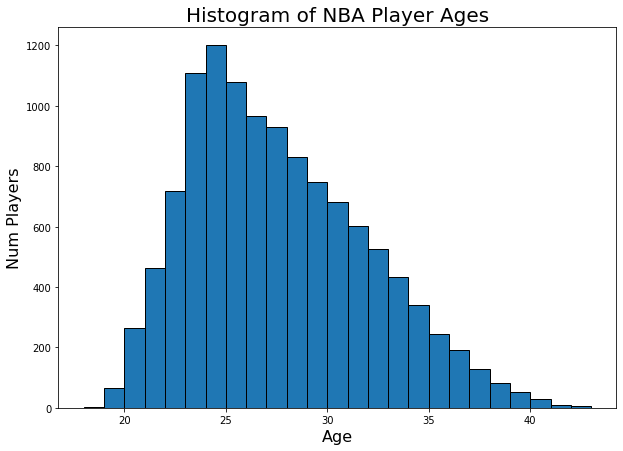

In [6]:

age_min = age.values.min().astype('int')
age_max = age.values.max().astype('int')

plt.figure(figsize=[10,7])
plt.hist(data=age,x='age',bins=range(age_min,age_max),edgecolor='black')
plt.title('Histogram of NBA Player Ages',fontsize=20)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Num Players',fontsize=16)



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

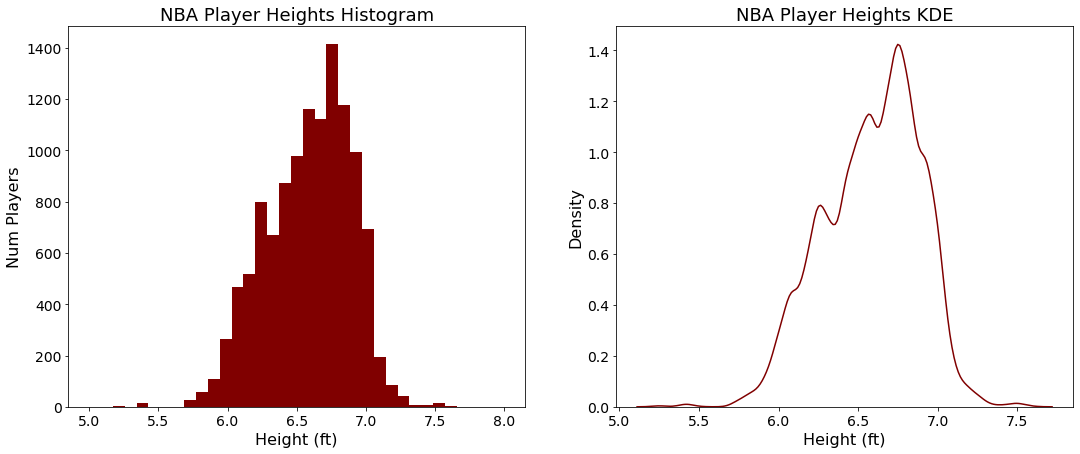

In [7]:
height_bins = np.linspace(5,8,36)
height_bins

plt.figure(figsize=[18,7])

plt.subplot(121)
plt.hist(data=height,x='player_height',bins=height_bins,color='maroon')
plt.title('NBA Player Heights Histogram',fontsize=18)
plt.xlabel('Height (ft)',fontsize=16)
plt.ylabel('Num Players',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

heights = height.reset_index(drop=True)

plt.subplot(122)
sns.kdeplot(data=heights,x='player_height',color='maroon')
plt.title('NBA Player Heights KDE',fontsize=18)
plt.xlabel('Height (ft)',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [8]:
numeric_cols = numeric_cols.reset_index(drop=True)

Text(0.5, 1.0, 'Regplot of NBA Player Heights and Season Avg. Rebounds')

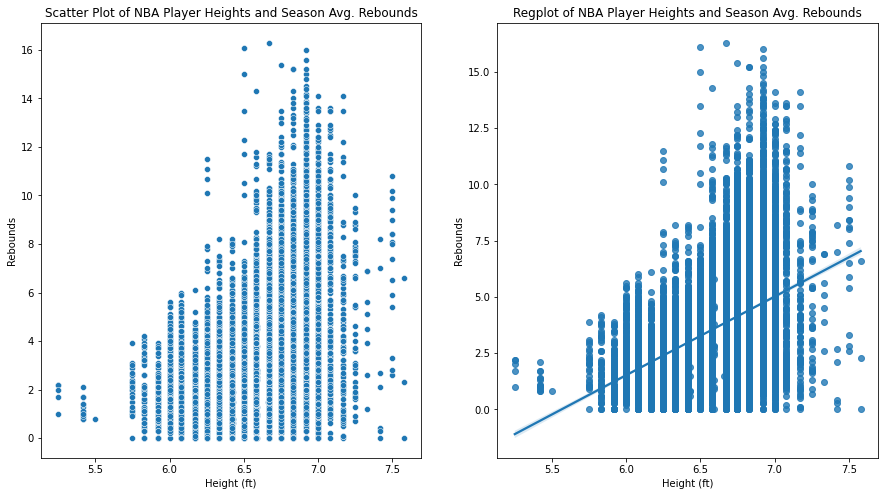

In [9]:
plt.figure(figsize=[15,8])

plt.subplot(121)
sns.scatterplot(data=numeric_cols,x='player_height',y='reb')
plt.xlabel('Height (ft)')
plt.ylabel('Rebounds')
plt.title('Scatter Plot of NBA Player Heights and Season Avg. Rebounds')

plt.subplot(122)
sns.regplot(data=numeric_cols,x='player_height',y='reb')
plt.xlabel('Height (ft)')
plt.ylabel('Rebounds')
plt.title('Regplot of NBA Player Heights and Season Avg. Rebounds')



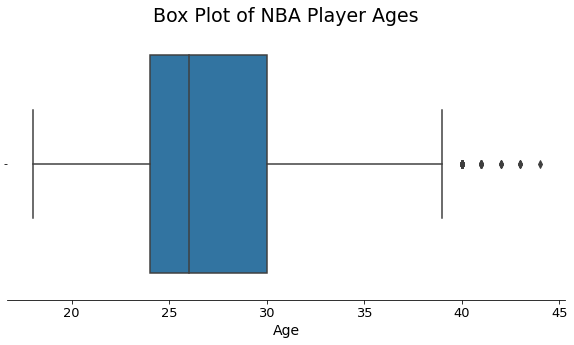

In [10]:
plt.figure(figsize=[10,5])
sns.boxplot(data=numeric_cols,x='age')
plt.title('Box Plot of NBA Player Ages',fontsize=19)
plt.xticks(fontsize=13)
plt.xlabel('Age',fontsize=14)
sns.despine(left=True,top=True,right=True)

Text(0.5, 0, 'Avg Points')

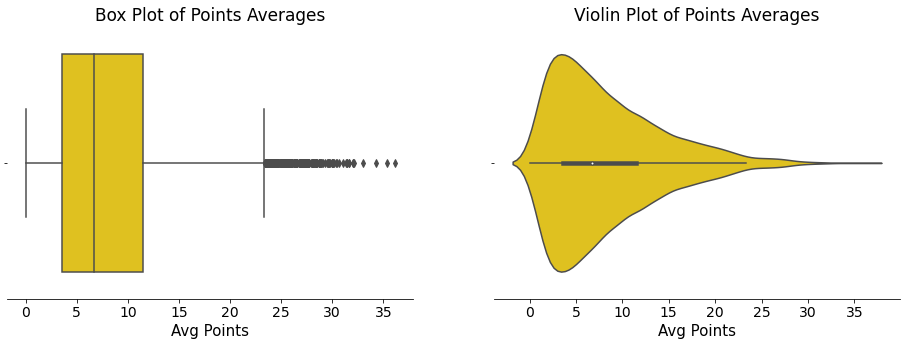

In [11]:
plt.figure(figsize=[16,5])

plt.subplot(1,2,1)
sns.boxplot(data=numeric_cols,x='pts',color='gold')
sns.despine(left=True,top=True,right=True)
plt.title('Box Plot of Points Averages',fontsize=17)
plt.xticks(fontsize=14)
plt.xlabel('Avg Points',fontsize=15)

plt.subplot(1,2,2)
sns.violinplot(data=numeric_cols,x='pts',color='gold')
sns.despine(left=True,right=True,top=True)
plt.title('Violin Plot of Points Averages',fontsize=17)
plt.xticks(fontsize=14)
plt.xlabel('Avg Points',fontsize=15)


In [12]:
nba_countries = pd.DataFrame(countries.value_counts()).reset_index()
nba_countries.columns = ['country','num_players']

Text(0.5, 0, 'Country')

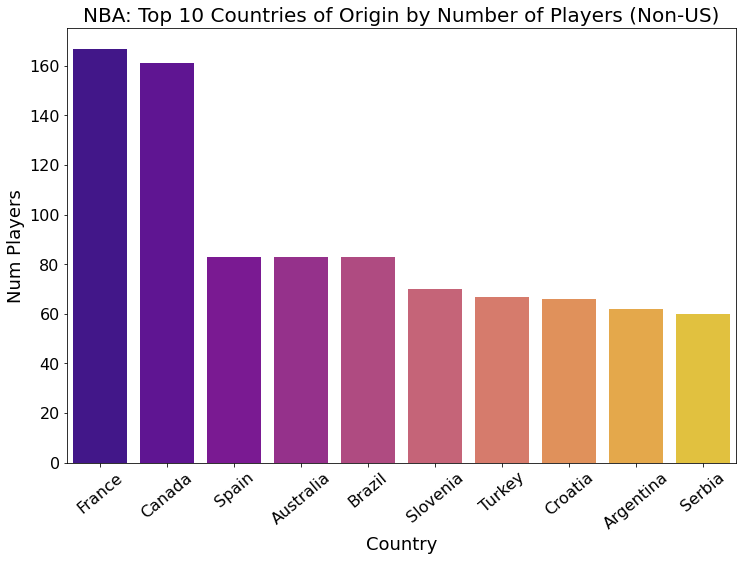

In [13]:
nba_abroad = nba_countries.iloc[1:11,:]

plt.figure(figsize=[12,8])

colormap1 = sns.color_palette('plasma',10)

sns.barplot(data=nba_abroad,x='country',y='num_players',palette=colormap1)
plt.xticks(rotation=40,fontsize=16)
plt.yticks(fontsize=16)
plt.title('NBA: Top 10 Countries of Origin by Number of Players (Non-US)',fontsize=20)
plt.ylabel('Num Players',fontsize=18)
plt.xlabel('Country',fontsize=18)


In [14]:
players_by_season = pd.DataFrame(nba_data.season.value_counts())
players_by_season = players_by_season.reset_index()
players_by_season.columns = ['season','count']
players_by_season = players_by_season.sort_values(by='season')

Text(0.5, 0, 'Season')

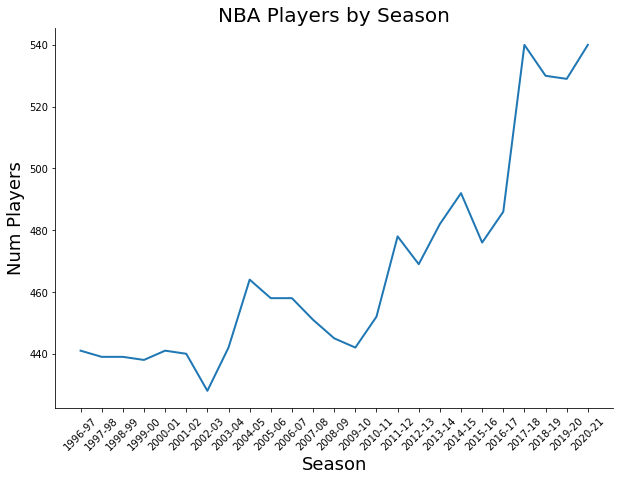

In [15]:
plt.figure(figsize=[10,7])

sns.lineplot(data=players_by_season,x='season',y='count',lw=2)
sns.despine(right=True,top=True)
plt.xticks(rotation='45')
plt.title('NBA Players by Season',fontsize=20)
plt.ylabel('Num Players',fontsize=18)
plt.xlabel('Season',fontsize=18)



In [16]:
colleges = pd.DataFrame(nba_data.college.value_counts()).reset_index()
colleges.columns = ['college','num_players']
feeder_schools = colleges.where(colleges.num_players >= 115).dropna()
#feeder_schools

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'player_height'),
  Text(0, 2.5, 'player_weight'),
  Text(0, 3.5, 'gp'),
  Text(0, 4.5, 'pts'),
  Text(0, 5.5, 'reb'),
  Text(0, 6.5, 'ast'),
  Text(0, 7.5, 'net_rating')])

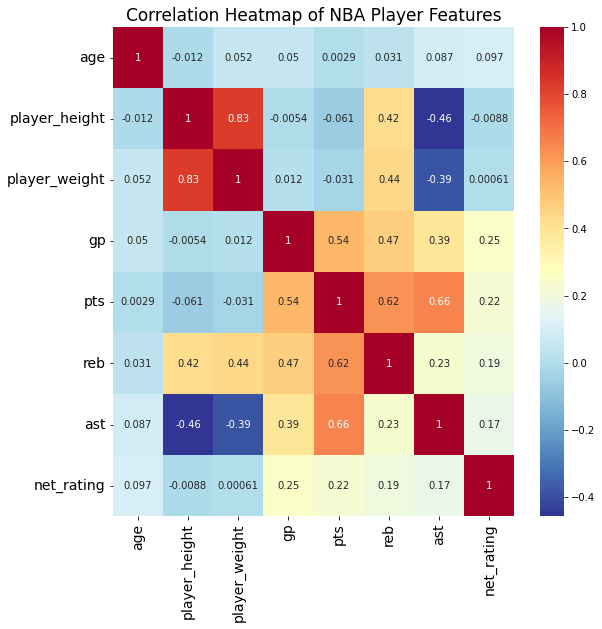

In [17]:
plt.figure(figsize=[9,9])
sns.heatmap(numeric_cols.corr(),cmap='RdYlBu_r',annot=True)
plt.title('Correlation Heatmap of NBA Player Features',fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [18]:
pbp = pd.read_csv('nba_pbp.csv')
print(pbp.columns)
pbp.head()

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss'],
      dtype='object')


,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,720,DET,Jump ball: A. Drummond vs. A. Horford (E. lyasova gains possession),0,ATL,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A. Drummond - drumman01,A. Horford - horfoal01,E. İlyasova - ilyaser01
1,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,701,DET,A. Drummond misses 2-pt layup from 1 ft (block by A. Horford),0,ATL,NaN,0,A. Drummond - drumman01,2-pt layup,miss,1.0,NaN,A. Horford - horfoal01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,699,DET,NaN,0,ATL,Defensive rebound by K. Bazemore,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K. Bazemore - bazemke01,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,697,DET,NaN,0,ATL,Turnover by K. Bazemore (bad pass),0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K. Bazemore - bazemke01,bad pass,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,October 27 2015,8:00 PM,DET,1,681,DET,M. Morris makes 2-pt jump shot from 13 ft (assist by A. Drummond),2,ATL,NaN,0,M. Morris - morrima03,2-pt jump shot,make,13.0,A. Drummond - drumman01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pbp.Date.unique()

game = pbp.loc[(pbp.Date == 'February 27 2016')&(pbp.WinningTeam == 'GSW')]
len(game)

514

In [24]:
game = game.reset_index(drop=True)
game.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss
0,/boxscores/201602270OKC.html,regular,Chesapeake Energy Arena Oklahoma City Oklahoma,February 27 2016,8:30 PM,GSW,1,720,GSW,Jump ball: S. Adams vs. A. Bogut (S. Ibaka gains possession),0,OKC,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S. Adams - adamsst01,A. Bogut - bogutan01,S. Ibaka - ibakase01
1,/boxscores/201602270OKC.html,regular,Chesapeake Energy Arena Oklahoma City Oklahoma,February 27 2016,8:30 PM,GSW,1,710,GSW,NaN,0,OKC,Personal foul by S. Curry (drawn by K. Durant),0,NaN,NaN,NaN,NaN,NaN,NaN,personal,S. Curry - curryst01,K. Durant - duranke01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201602270OKC.html,regular,Chesapeake Energy Arena Oklahoma City Oklahoma,February 27 2016,8:30 PM,GSW,1,706,GSW,NaN,0,OKC,R. Westbrook makes 2-pt layup at rim,2,R. Westbrook - westbru01,2-pt layup,make,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201602270OKC.html,regular,Chesapeake Energy Arena Oklahoma City Oklahoma,February 27 2016,8:30 PM,GSW,1,688,GSW,D. Green misses 2-pt layup at rim,0,OKC,NaN,2,D. Green - greendr01,2-pt layup,miss,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201602270OKC.html,regular,Chesapeake Energy Arena Oklahoma City Oklahoma,February 27 2016,8:30 PM,GSW,1,687,GSW,NaN,0,OKC,Defensive rebound by K. Durant,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K. Durant - duranke01,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


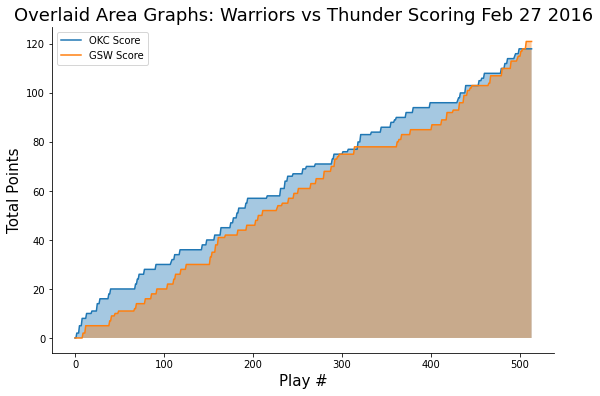

In [38]:
plt.figure(figsize=[9,6])

plt.plot(game.index,game.HomeScore,label='OKC Score')
plt.fill_between(game.index,game.HomeScore,alpha=0.4)

plt.plot(game.index,game.AwayScore,label='GSW Score')
plt.fill_between(game.index,game.AwayScore,alpha=0.4)
plt.xlabel('Play #',fontsize=15)
plt.ylabel('Total Points',fontsize=15)
plt.title('Overlaid Area Graphs: Warriors vs Thunder Scoring Feb 27 2016',fontsize=18)
plt.legend()

sns.despine()
